In [1]:
from pyntcloud import PyntCloud
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point

In [2]:
lidar_cloud = PyntCloud.from_file(os.path.join("data", "lidar_data02.pcd"))
lcpoints = lidar_cloud.points

# Display the star shape from rotating rectangles

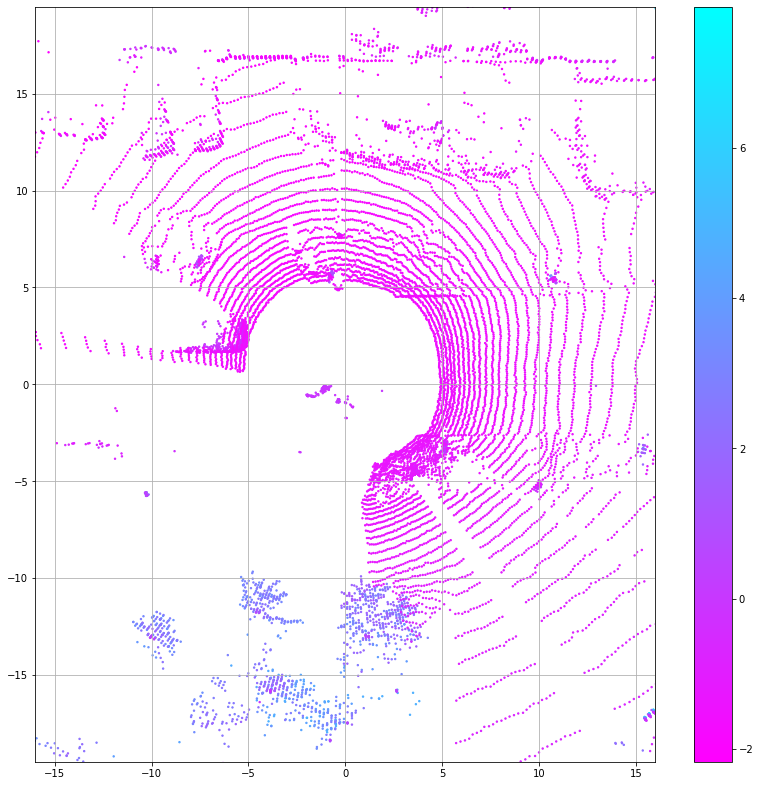

In [3]:
cm1 = plt.cm.get_cmap("cool_r")
cm2 = plt.cm.get_cmap("turbo")
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
fig1 = plt.figure(figsize=(1000*px, 1000*px))
lcpoints = lcpoints[lcpoints.x > -20].dropna()
lcpoints = lcpoints[lcpoints.x <  20].dropna()
lcpoints = lcpoints[lcpoints.y > -20].dropna()
lcpoints = lcpoints[lcpoints.y <  20].dropna()
filter_arr = (lcpoints.x > 0.00001) | (lcpoints.x < -0.00001) | (lcpoints.y > 0.00001) | (lcpoints.y < -0.00001)
lcpoints = lcpoints[filter_arr]
plt.scatter(lcpoints.x, lcpoints.y, c = lcpoints.z, s=2.0, cmap=cm1)
plt.colorbar()
plt.axis('equal')
plt.xlim(-16, 16)
plt.ylim(-16, 16)
plt.grid()
plt.show()

## Select a single channel (ring) and mark it with black

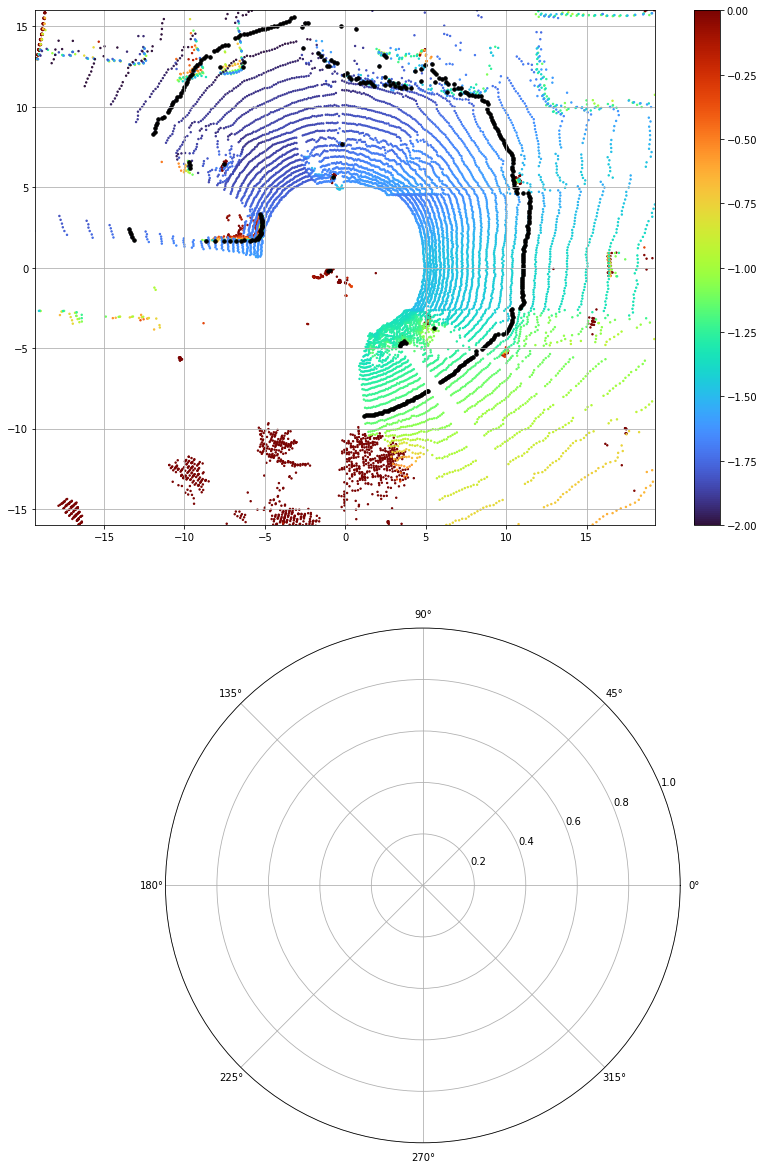

In [4]:
lcpoints_1ring = lcpoints[lcpoints.ring == 45].dropna()
plt.figure(figsize=(1000*px, 1500*px))
plt.subplot(211)
plt.scatter(lcpoints.x, lcpoints.y, c = lcpoints.z, vmin = -2, vmax = 0, s=2.0, cmap=cm2)
plt.colorbar()
plt.scatter(lcpoints_1ring.x, lcpoints_1ring.y, c = "#000000", s=12)
plt.axis('equal')
plt.xlim(-16, 16)
plt.ylim(-16, 16)
plt.grid()
plt.subplot(212, projection='polar')

plt.show()

## `ring_new_x` is a 0-360 deg oreintation representation of a single channel

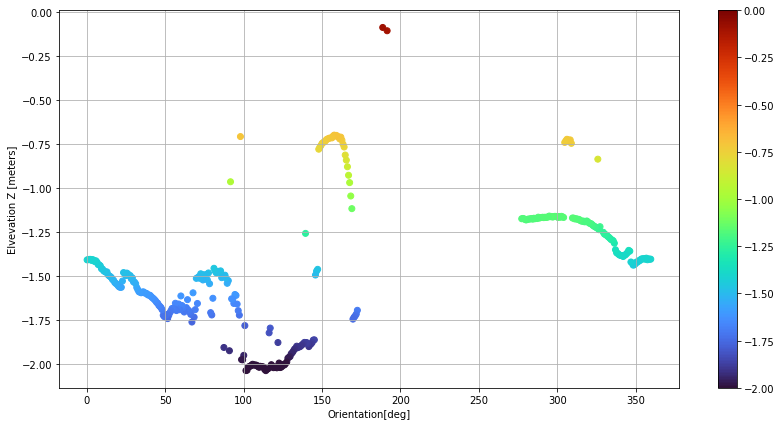

In [5]:
fig3 = plt.figure(figsize=(1000*px, 500*px))
ring_new_x = np.arctan2(lcpoints_1ring.y, lcpoints_1ring.x) / np.math.pi * 180 
ring_new_x = np.where(ring_new_x < 0, ring_new_x + 360, ring_new_x)
# print(ring_new_x.astype(int))
plt.scatter(ring_new_x, lcpoints_1ring.z, c = lcpoints_1ring.z, vmin = -2, vmax = 0, cmap=cm2)
plt.colorbar()
plt.grid()
plt.xlabel("Orientation[deg]")
plt.ylabel("Elvevation Z [meters]")
plt.show()